In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
rcParams["figure.figsize"] = 15,10
sns.set_style("darkgrid")

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.metrics import recall_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')

In [ ]:
data = pd.read_csv("data.csv")
data.drop("Unnamed: 32", axis = 1, inplace = True)
data.drop("id", axis = 1, inplace = True)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

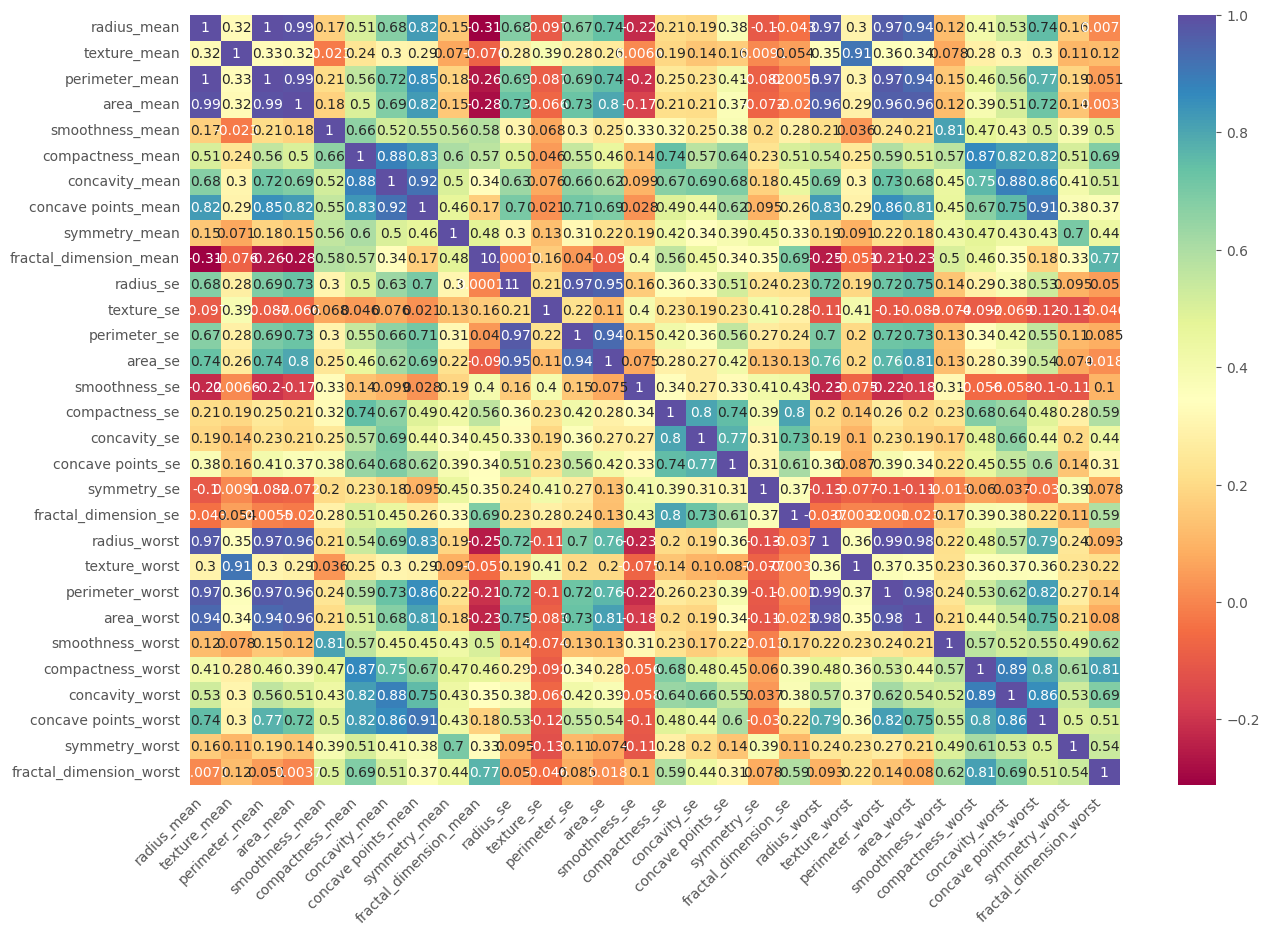

In [ ]:
sns.heatmap(data.corr(), annot = True, cmap = "Spectral")
plt.xticks(rotation=45, ha='right')
plt.show()

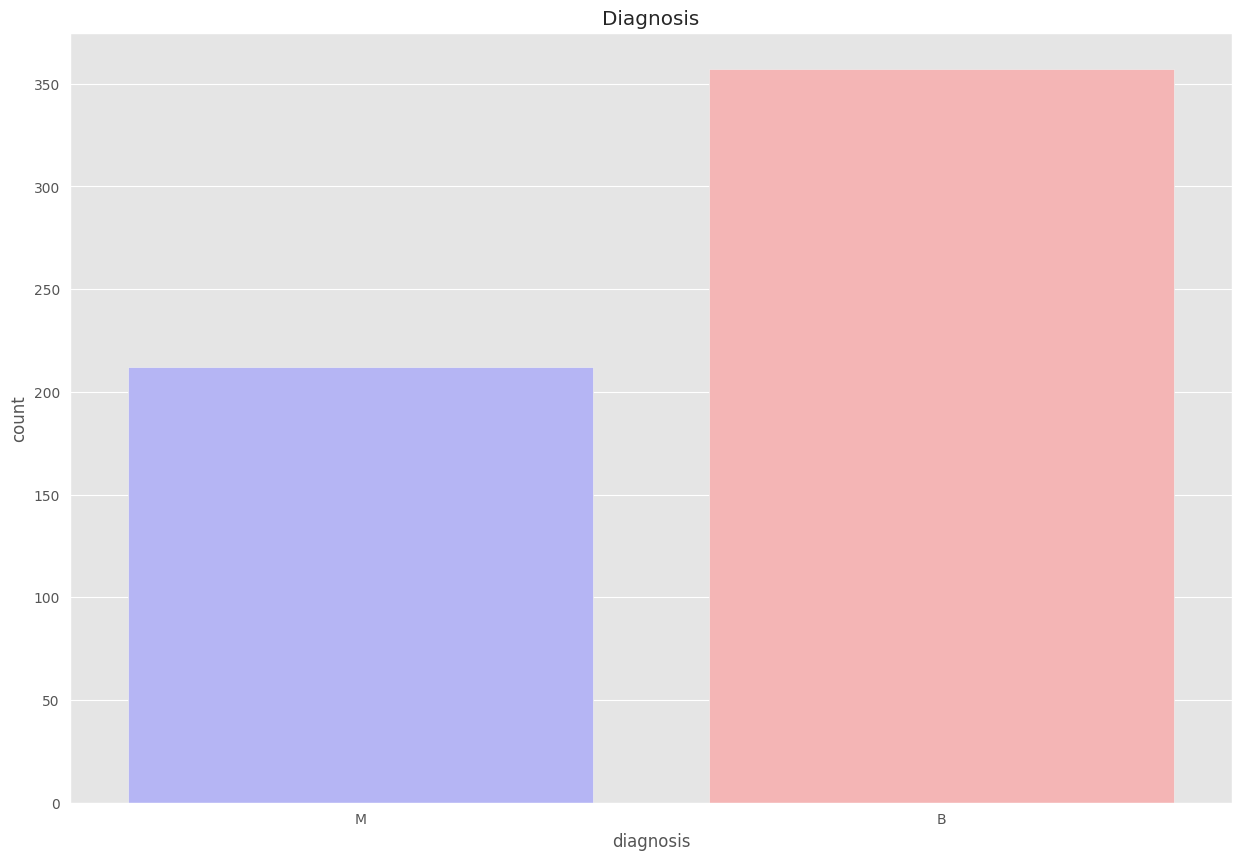

In [ ]:
sns.countplot(x = "diagnosis", data = data, palette="bwr")
plt.title("Diagnosis")
plt.show()

In [ ]:
x = data.drop("diagnosis", axis = 1)
y = data["diagnosis"]
scaler = MinMaxScaler()
xScaled = scaler.fit_transform(x)
x_df = pd.DataFrame(data = xScaled, columns=x.columns)
trainX, testX, trainY, testY = train_test_split(x_df, y, test_size =0.3, random_state=100)

In [ ]:
logR = LogisticRegression()
logR.fit(trainX,trainY)
predictionsTrain = logR.predict(trainX)
predictionsTest = logR.predict(testX)

In [ ]:
print('Training Accuracy')
print(logR.score(trainX, trainY))
print('Testing Accuracy')
print(logR.score(testX, testY))

Training Accuracy
0.9723618090452262
Testing Accuracy
0.9473684210526315


In [ ]:
print("log regression: ", accuracy_score(testY, predictionsTest))

log regression:  0.9473684210526315


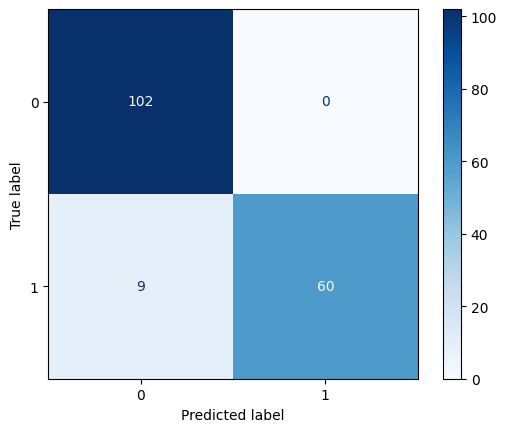

In [ ]:
cm = confusion_matrix(testY, predictionsTest)
sns.reset_orig()
show = ConfusionMatrixDisplay(confusion_matrix=cm)
show.plot(cmap="Blues")
#plt.grid(b=None)
plt.show()

In [ ]:
#recall_score(testY, predictionsTest, average="binary", pos_label="neg")
TN, FP, FN, TP = cm.ravel()
print("Logistic Regression Recall: ",(TP/(TP+FN)))

Logistic Regression Recall:  0.8695652173913043


In [ ]:
#DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion= "gini", max_depth = 3, random_state=0)
clf_gini.fit(trainX,trainY)
pred_dtree = clf_gini.predict(testX)

In [ ]:
cm_dTree = confusion_matrix(testY, pred_dtree)

TN, FP, FN, TP = cm_dTree.ravel()
print("Decision Tree Recall: ",(TP/(TP+FN)))

Decision Tree Recall:  0.8985507246376812


In [ ]:
print("Accuracy:",accuracy_score(testY, pred_dtree))


Accuracy: 0.9473684210526315


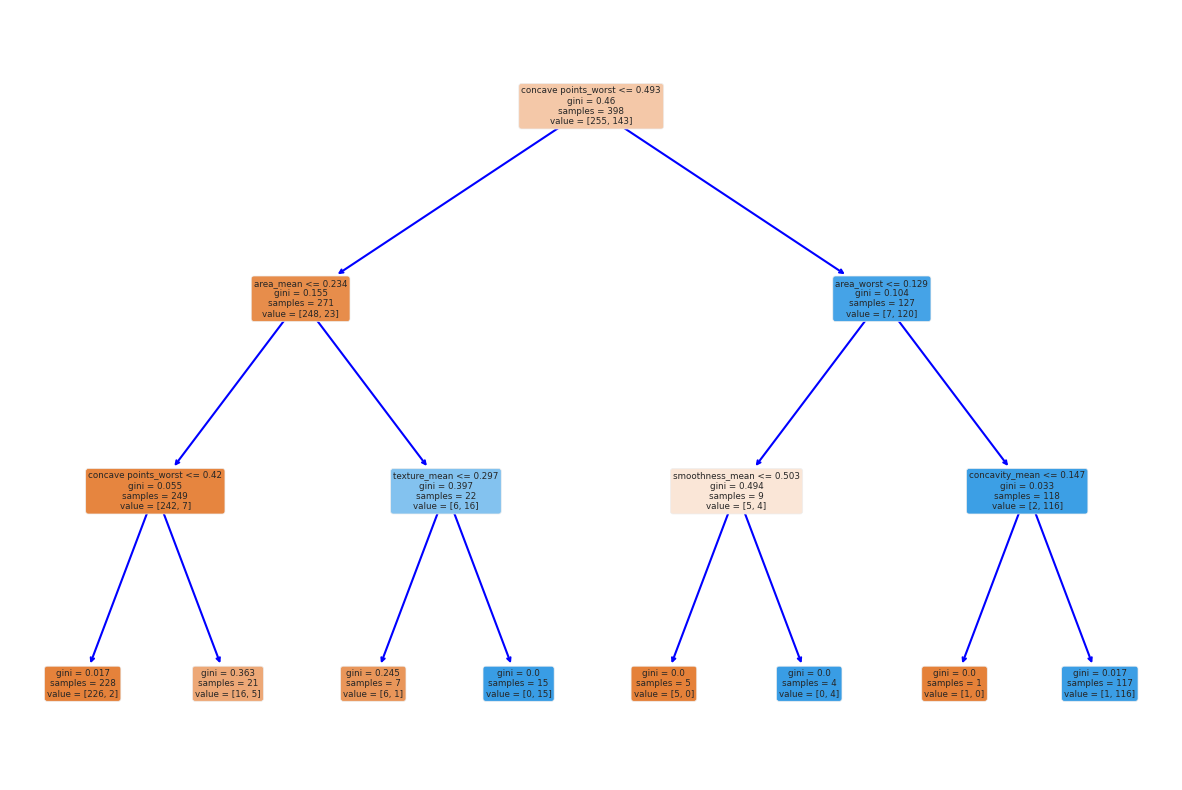

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
out = tree.plot_tree(clf_gini, filled=True, rounded=True,
                     feature_names=x.columns)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('blue')
        arrow.set_linewidth(1.5)

In [ ]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(trainX,trainY)
rfc_pred = rfc.predict(testX)
print("Model accuracy score: {0:0.4f}".format(accuracy_score(testY,rfc_pred)))

Model accuracy score: 0.9591


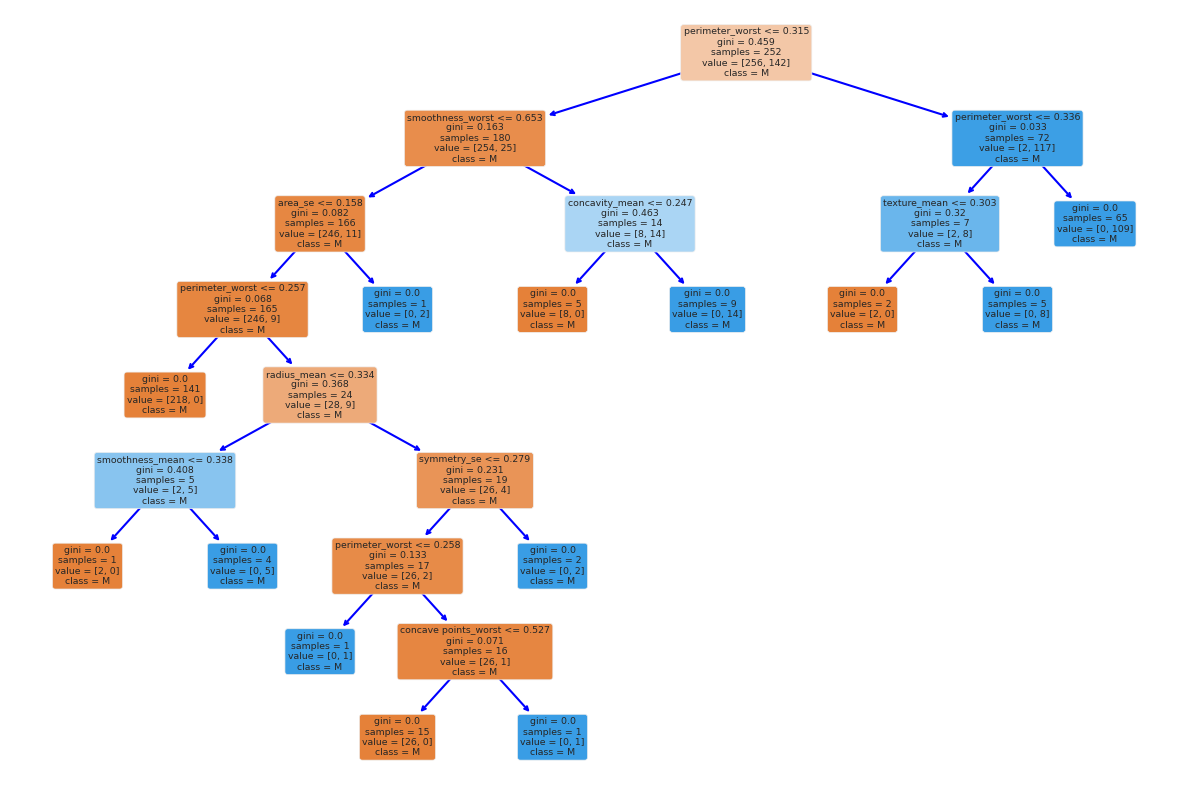

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
out = tree.plot_tree(rfc.estimators_[65], filled=True, rounded=True, impurity=True,
                     class_names = y,
                     feature_names=x.columns)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('blue')
        arrow.set_linewidth(1.5)

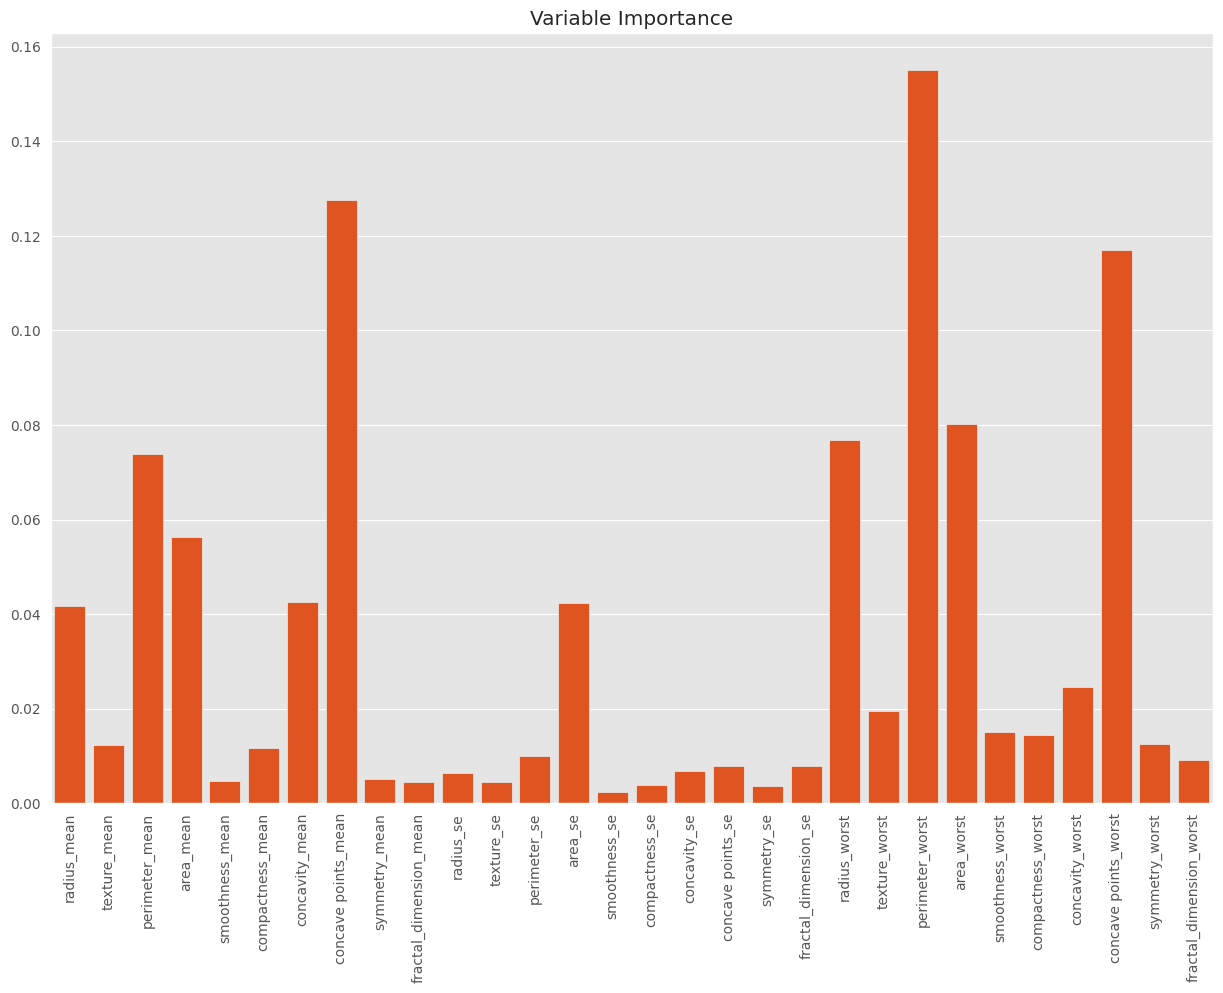

In [ ]:
sns.barplot(x= x.columns, y=rfc.feature_importances_, color="orangered")
plt.title("Variable Importance")
plt.xticks(rotation = 90)
plt.show()

In [ ]:
cm_randForest = confusion_matrix(testY, rfc_pred)

TN, FP, FN, TP = cm_randForest.ravel()
print("Random Forest Recall: ",(TP/(TP+FN)))

Random Forest Recall:  0.9420289855072463


In [ ]:
#naive bayes
gnb = GaussianNB()
gnb.fit(trainX,trainY)
y_pred = gnb.predict(testX)
print("Model accuracy score: {0:0.4f}".format(accuracy_score(testY,y_pred)))

Model accuracy score: 0.9357


In [ ]:
cm_NB = confusion_matrix(testY, y_pred)

print('Confusion matrix\n\n', cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[102   0]
 [  9  60]]
True Positives(TP) =  102
True Negatives(TN) =  60
False Positives(FP) =  0
False Negatives(FN) =  9


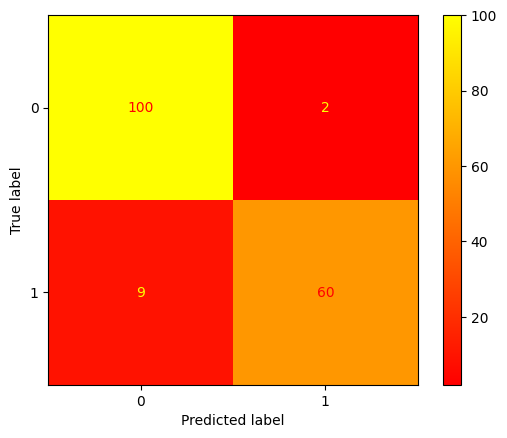

In [ ]:
cm_NB = confusion_matrix(testY, y_pred)
sns.reset_orig()
show = ConfusionMatrixDisplay(confusion_matrix=cm_NB)
show.plot(cmap = "autumn")
plt.show()

In [ ]:
TN, FP, FN, TP = cm_NB.ravel()
print("Naive Bayes Recall: ",(TP/(TP+FN)))

Naive Bayes Recall:  0.8695652173913043


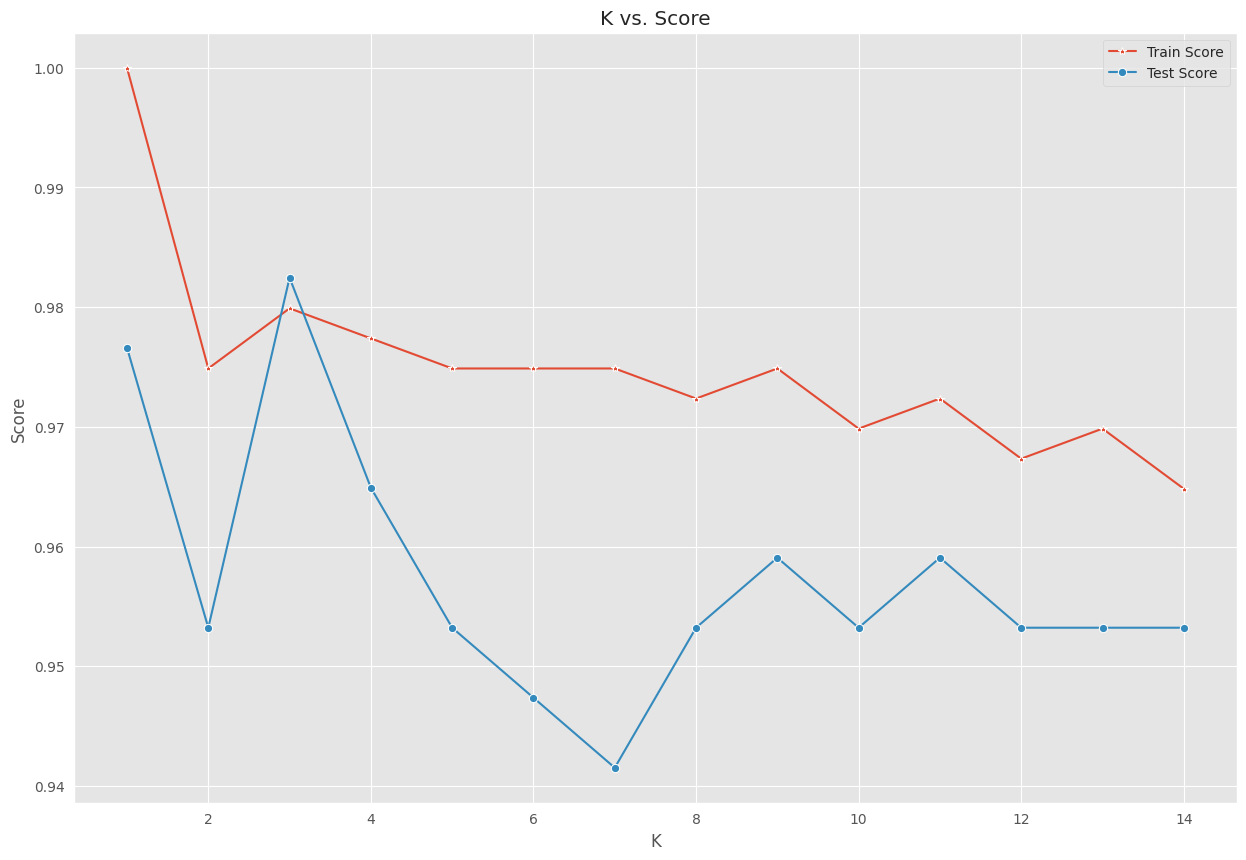

In [ ]:
#KNN
test_scores = []
train_scores = []
scores = []
for i in range(1,15):
    knn = KNeighborsClassifier(i)
    knn.fit(trainX,trainY)
    train_scores.append(knn.score(trainX,trainY))
    test_scores.append(knn.score(testX,testY))
    score = cross_val_score(knn, x, y, cv=5)
    scores.append(np.mean(score))


sns.lineplot(x = range(1,15), y = train_scores, marker = "*", label = "Train Score")
sns.lineplot(x = range(1,15), y = test_scores, marker = "o", label = "Test Score")
plt.title("K vs. Score")
plt.xlabel("K")
plt.ylabel("Score")
plt.show()


In [ ]:
knn = KNeighborsClassifier(2)
knn.fit(trainX, trainY)
print("KNN accuracy: ", knn.score(testX,testY))

KNN accuracy:  0.9532163742690059


In [ ]:
from sklearn.metrics import classification_report

pred_knn = knn.predict(testX)
print(classification_report(testY,pred_knn))
cm_knn = confusion_matrix(testY,pred_knn)
print(cm_knn)
TN, FP, FN, TP = cm_knn.ravel()
print("KNN Recall: ",(TP/(TP+FN)))

              precision    recall  f1-score   support

           B       0.93      1.00      0.96       102
           M       1.00      0.88      0.94        69

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.96      0.95      0.95       171

[[102   0]
 [  8  61]]
KNN Recall:  0.8840579710144928


In [ ]:
coef_df =pd.DataFrame({"Features":x_df.columns,"Coefficient":logR.coef_[0]})
coef_df

,Features,Coefficient
0,radius_mean,1.684813
1,texture_mean,1.574805
2,perimeter_mean,1.657188
3,area_mean,1.420294
4,smoothness_mean,0.751964
5,compactness_mean,0.375979
6,concavity_mean,1.337680
7,concave points_mean,2.023635
8,symmetry_mean,0.541884
9,fractal_dimension_mean,-0.865974


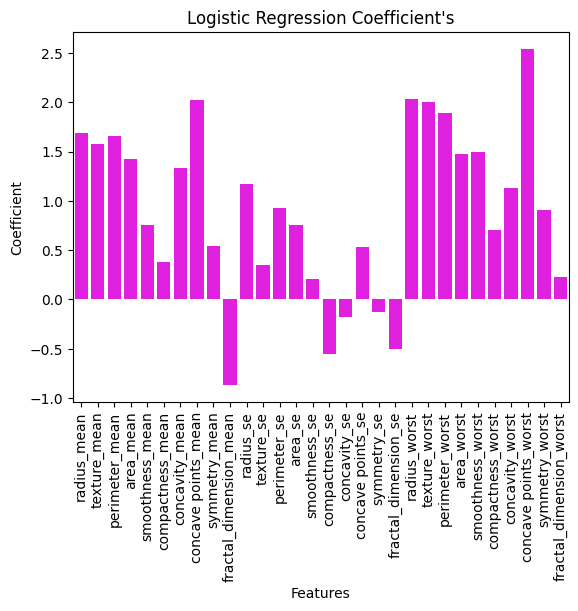

In [ ]:
sns.barplot(x= "Features", y="Coefficient", data = coef_df ,color="magenta")
plt.title("Logistic Regression Coefficient's")
plt.xticks(rotation = 90)
plt.show()